In [1]:
import networkx as nx
import os as os
import random
import numpy as np
import SignificanceProfileHelper as sp
import scipy.cluster.hierarchy as sch
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
collegeMsg = nx.read_edgelist('data/collegeMessage/CollegeMsg.txt', 
                                    create_using=nx.DiGraph(), 
                                    nodetype=str, data=[('unix_timestamp', int)])

In [3]:
bitcoinAlpha = nx.read_edgelist('data/bitcoinAlpha/bitcoinAlpha.txt', 
                                    create_using=nx.DiGraph(), 
                                    nodetype=str, data=[('rating', int), ('time', int)])

In [4]:
email_eu_core = nx.read_edgelist('data/email_EU/email_Eu_core.txt', 
                                    create_using=nx.DiGraph(), 
                                    nodetype=str)

In [5]:
email_eu_core_dep_labels = nx.read_edgelist('data/email_EU/email_Eu_core_department_labels.txt', 
                                    create_using=nx.DiGraph(), 
                                    nodetype=str)

In [6]:
gnutella = nx.read_edgelist('data/Gnutella/p2p_Gnutella.txt', 
                                    create_using=nx.DiGraph(), 
                                    nodetype=str)

In [7]:
bitcoinOTC = nx.read_edgelist('data/bitcoinOTC/bitcoinotc.txt', 
                                    create_using=nx.DiGraph(), 
                                    nodetype=str, data=[('rating', int), ('time', int)])

In [8]:
ecoli = nx.read_edgelist('data/ecoli/coli.txt', 
                                    create_using=nx.DiGraph(), 
                                    nodetype=str, data=[('rating', int)])

In [9]:
sig_profile_bitcoinAlpha = None
sig_profile_emailEuCore = None
sig_profile_gnutella_p2p = None
sig_profile_bitcoinOTC = None
sig_profile_collegeMsg = None

real_collegeMsg = None
real_bitcoinAlpha = None
real_emailEuCore = None
real_gnutella = None
real_bitcoinOTC = None

rand_collegeMsg = None
rand_bitcoinAlpha = None
rand_emailEuCore = None
rand_gnutella = None
rand_bitcoinOTC = None

In [19]:
real_collegeMsg = [triad[1] for triad in sp.getTriads(collegeMsg)]
real_bitcoinAlpha = [triad[1] for triad in sp.getTriads(bitcoinAlpha)]
real_emailEuCore = [triad[1] for triad in sp.getTriads(email_eu_core)]
real_gnutella = [triad[1] for triad in sp.getTriads(gnutella)]
real_bitcoinOTC = [triad[1] for triad in sp.getTriads(bitcoinOTC)]

rand_collegeMsg = [triad[1] for triad in sp.getTriads(sp.generateDirectedConfigurationModel(collegeMsg))]
rand_bitcoinAlpha = [triad[1] for triad in sp.getTriads(sp.generateDirectedConfigurationModel(bitcoinAlpha))]
rand_emailEuCore = [triad[1] for triad in sp.getTriads(sp.generateDirectedConfigurationModel(email_eu_core))]
rand_gnutella = [triad[1] for triad in sp.getTriads(sp.generateDirectedConfigurationModel(gnutella))]
rand_bitcoinOTC = [triad[1] for triad in sp.getTriads(sp.generateDirectedConfigurationModel(bitcoinOTC))]

In [9]:
sig_profile_collegeMsg = sp.getFullProfile(collegeMsg, 5) 

In [10]:
sig_profile_bitcoinAlpha = sp.getFullProfile(bitcoinAlpha, 5)

In [11]:
sig_profile_emailEuCore = sp.getFullProfile(email_eu_core, 5)

In [12]:
sig_profile_gnutella_p2p = sp.getFullProfile(gnutella, 5)

In [13]:
sig_profile_bitcoinOTC = sp.getFullProfile(bitcoinOTC, 5)

In [20]:
def buildSnapshotPlot():
    # Lines on top of scatter
    xAxis = [1,2,3,4,5,6,7,8,9,10,11,12,13]

    plt.figure()
    fig, ax = plt.subplots(1,1,figsize=(25, 12))
    ax.grid(True, which='minor')
    ax.axhline(y=0, color='k')
    plt.xticks(np.arange(min(xAxis), max(xAxis)+1, 1.0))
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    
    if(real_bitcoinAlpha != None):
        plt.plot(xAxis, real_bitcoinAlpha, 'm', lw=2, label='real bitcoin alpha', zorder=1)
        plt.scatter(xAxis, real_bitcoinAlpha, s=400, zorder=2, c='m', marker='>')
        
    if(rand_bitcoinAlpha != None):
        plt.plot(xAxis, rand_bitcoinAlpha, 'm', lw=2, label='rand bitcoin alpha', zorder=1)
        plt.scatter(xAxis, rand_bitcoinAlpha, s=400, zorder=2, c='m', marker=(5, 2))
    
    if(real_bitcoinOTC != None):
        plt.plot(xAxis, real_bitcoinOTC, 'b', lw=2, label='real bitcoin otc', zorder=1)
        plt.scatter(xAxis, real_bitcoinOTC, s=400, zorder=2, c='b', marker='>')
        
    if(rand_bitcoinOTC != None):
        plt.plot(xAxis, rand_bitcoinOTC, 'b', lw=2, label='rand bitcoin otc', zorder=1)
        plt.scatter(xAxis, rand_bitcoinOTC, s=400, zorder=2, c='b', marker=(5, 2))
    
    if(real_collegeMsg != None):
        plt.plot(xAxis, real_collegeMsg, 'g', lw=2, label='real college message', zorder=1)
        plt.scatter(xAxis, real_collegeMsg, s=400, zorder=2, c='g', marker='>')
        
    if(rand_collegeMsg != None):
        plt.plot(xAxis, rand_collegeMsg, 'g', lw=2, label='rand college message', zorder=1)
        plt.scatter(xAxis, rand_collegeMsg, s=400, zorder=2, c='g', marker=(5, 2))
    
    if(real_emailEuCore != None):
        plt.plot(xAxis, real_emailEuCore, 'c', lw=2, label='real email EU core', zorder=1)
        plt.scatter(xAxis, real_emailEuCore, s=400, zorder=2, c='c', marker='>')
        
    if(rand_emailEuCore != None):
        plt.plot(xAxis, rand_emailEuCore, 'c', lw=2, label='rand email EU core', zorder=1)
        plt.scatter(xAxis, rand_emailEuCore, s=400, zorder=2, c='c', marker=(5, 2))
    
    if(real_gnutella != None):
        plt.plot(xAxis, real_gnutella, 'r', lw=2, label='real gnutella p2p', zorder=1)
        plt.scatter(xAxis, real_gnutella, s=400, zorder=2, c='r', marker='>')
    
    if(rand_gnutella != None):
        plt.plot(xAxis, rand_gnutella, 'r', lw=2, label='rand gnutella p2p', zorder=1)
        plt.scatter(xAxis, rand_gnutella, s=400, zorder=2, c='r', marker=(5, 2))
        
    l = plt.legend(loc=1, fontsize=20)
    l.set_zorder(20)
        
    real_marker = mlines.Line2D([], [], color='blue', marker='>',
                          markersize=10, label='real graph')
    
    rand_marker = mlines.Line2D([], [], color='red', marker=(5,2),
                          markersize=10, label='random graph')
    
    plt.title('Motif vs. Quantity', fontsize=25)
    plt.xlabel("motif", fontsize=25)
    plt.ylabel("quantity", fontsize=25)

    plt.legend(handles=[real_marker, rand_marker], loc=2, fontsize=20)
    
    plt.gca().add_artist(l)
    
    drawTriadMotifGraphs()

In [21]:
def buildMotifPlot():
    # Lines on top of scatter
    xAxis = [1,2,3,4,5,6,7,8,9,10,11,12,13]

    plt.figure()
    fig, ax = plt.subplots(1,1,figsize=(20, 4.5))
    ax.grid(True, which='minor')
    ax.axhline(y=0, color='k')
    plt.xticks(np.arange(min(xAxis), max(xAxis)+1, 1.0))
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
    
    if(sig_profile_bitcoinAlpha != None):
        plt.plot(xAxis, sig_profile_bitcoinAlpha, 'm', lw=2, label='bitcoin alpha', zorder=1)
        plt.scatter(xAxis, sig_profile_bitcoinAlpha, s=100, zorder=2, c='m')
    
    if(sig_profile_bitcoinOTC != None):
        plt.plot(xAxis, sig_profile_bitcoinOTC, 'b', lw=2, label='bitcoin otc', zorder=1)
        plt.scatter(xAxis, sig_profile_bitcoinOTC, s=100, zorder=2, c='b')
    
    if(sig_profile_collegeMsg != None):
        plt.plot(xAxis, sig_profile_collegeMsg, 'g', lw=2, label='college message', zorder=1)
        plt.scatter(xAxis, sig_profile_collegeMsg, s=100, zorder=2, c='g')
    
    if(sig_profile_emailEuCore != None):
        plt.plot(xAxis, sig_profile_emailEuCore, 'c', lw=2, label='email EU core', zorder=1)
        plt.scatter(xAxis, sig_profile_emailEuCore, s=100, zorder=2, c='c')
    
    if(sig_profile_gnutella_p2p != None):
        plt.plot(xAxis, sig_profile_gnutella_p2p, 'r', lw=2, label='gnutella p2p', zorder=1)
        plt.scatter(xAxis, sig_profile_gnutella_p2p, s=100, zorder=2, c='r')
    
    plt.title('Significance profile', fontsize=25)
    plt.xlabel("motif", fontsize=25)
    plt.ylabel("normalized z-score", fontsize=25)

    l = plt.legend(fontsize=20)
    l.set_zorder(20)
    
    drawTriadMotifGraphs()

In [22]:
def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(1, 1, i+1)
        ax.tick_params(labelbottom=True, labelleft=True)

def drawTriadMotifGraphs():
    
    triad_graphs = sp.getTriadGraphs()
    gs = GridSpec(1, len(triad_graphs))
    xAxis = [1,2,3,4,5,6,7,8,9,10,11,12,13]
    fig, ax= plt.subplots(1,1,figsize=(30, 2))
    plt.tick_params(labelsize=20)
    
    i = 0

    for graph in triad_graphs:
        spec = plt.subplot(gs[0,i])
        nx.draw_spectral(graph)
        plt.plot()
        i += 1
    
    
    make_ticklabels_invisible(fig)

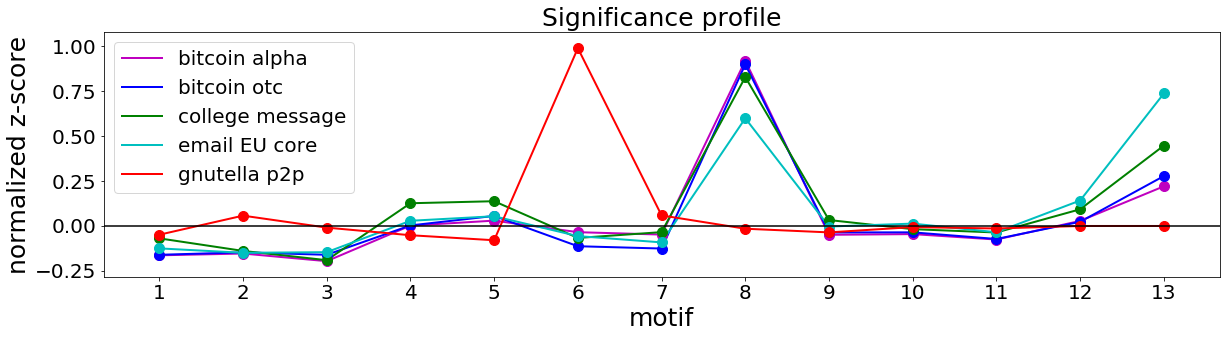

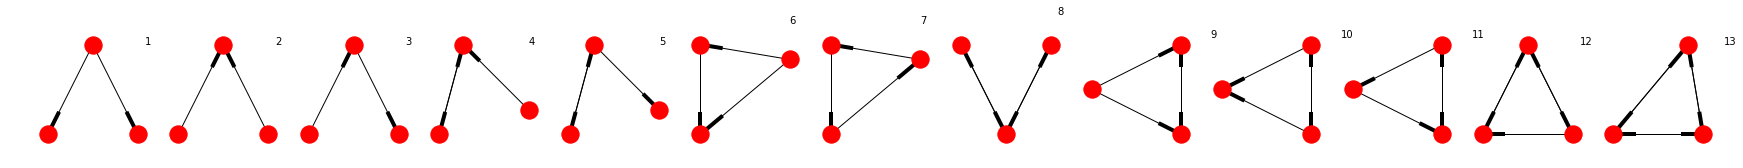

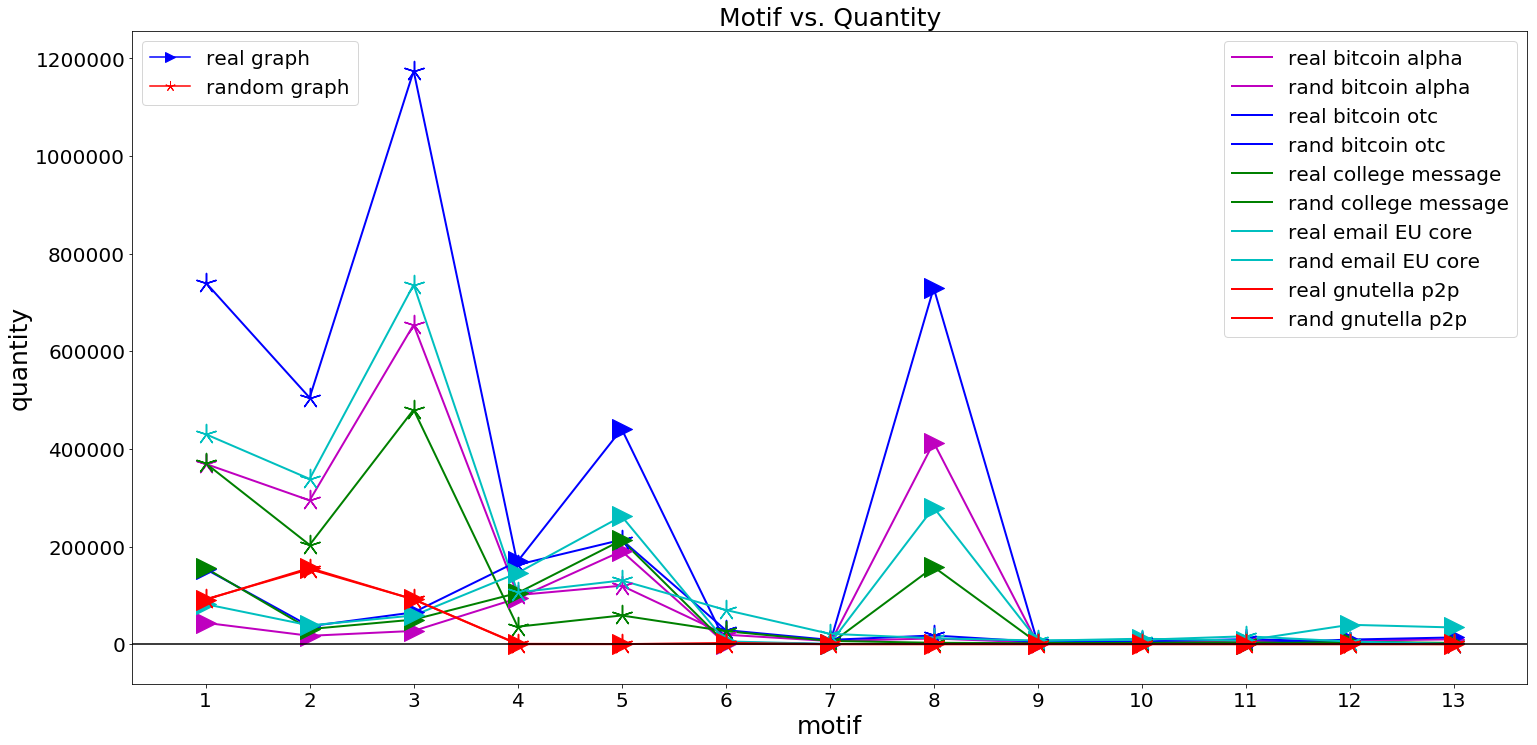

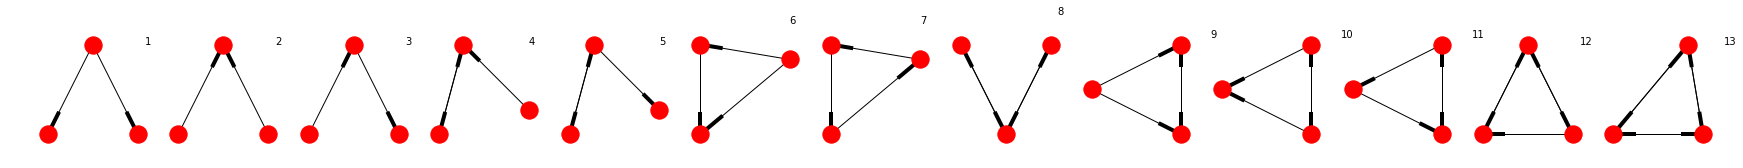

In [23]:
buildMotifPlot()
buildSnapshotPlot()

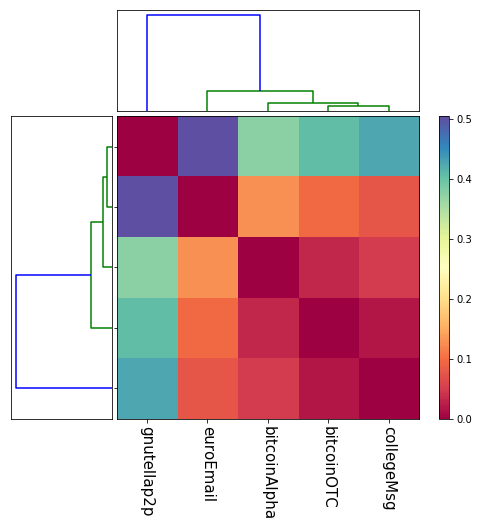

In [325]:
sum_college = sum(sig_profile_collegeMsg)
sum_bitOTC = sum(sig_profile_bitcoinOTC)
sum_bitAlpha = sum(sig_profile_bitcoinAlpha)
sum_email = sum(sig_profile_emailEuCore)
sum_gnutella = sum(sig_profile_gnutella_p2p)
sum_list = [sum_college, sum_bitOTC, sum_bitAlpha,sum_email, sum_gnutella]

name_list = ["collegeMsg", "bitcoinOTC", "bitcoinAlpha", "euroEmail", "gnutellap2p"]
name_list1 = name_list[::-1]

similarity_matrix = np.zeros((len(sum_list),len(sum_list)))
for i in range(5):
    x = sum_list[i]
    for j in range(5):
        y = sum_list[j]
        similarity_matrix[i,j] = abs(x-y)  

fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(similarity_matrix)
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(similarity_matrix)
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
similarity_matrix = similarity_matrix[idx1,:]
similarity_matrix = similarity_matrix[:,idx2]
im = axmatrix.matshow(similarity_matrix, origin='upper', cmap=plt.cm.Spectral)

axmatrix.set_xticks(range(len(sum_list)))
axmatrix.set_xticklabels([name_list1[i] for i in idx1], minor=False, size =5)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

plt.xticks(rotation=-90, fontsize=15)

axmatrix.set_yticks(range(len(sum_list)))
axmatrix.set_yticklabels("", minor=False, size = 15)
axmatrix.yaxis.set_label_position('left')

axcolor = fig.add_axes([0.94,0.1,0.02,0.6])

plt.colorbar(im, cax=axcolor)
fig.show()
